In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/연세대학교/YBIGTA/신입기수 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/연세대학교/YBIGTA/신입기수 프로젝트


In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pymrmr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import dump

## Upload dataset

In [3]:
weather_df_jeju = pd.read_csv('dataset/weather_df_제주.csv')
weather_df_gosan = pd.read_csv('dataset/weather_df_고산.csv')
weather_df_seongsan = pd.read_csv('dataset/weather_df_성산.csv')
weather_df_seo = pd.read_csv('dataset/weather_df_서귀포.csv')

wind_df = pd.read_csv('dataset/windpower_df.csv')

In [4]:
wind_df.rename(columns = {'Date': 'date', 'Hour': 'hour'}, inplace = True)
wind_df['hour'] = wind_df['hour'].apply(lambda x : x + 1)

In [5]:
merged_df_jeju = weather_df_jeju.merge(wind_df[['date', 'hour', 'Wind Power (MWh)']], on = ['date', 'hour'], how = 'left')
merged_df_jeju

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,Wind Power (MWh)
0,2021-01-01,1,320.0,6.1,9.0,0.0,53.0,4.5,0.0,0.0,0.0,91.822526
1,2021-01-01,2,320.0,5.6,9.0,0.0,58.0,4.3,0.0,0.0,0.0,79.594526
2,2021-01-01,3,320.0,5.5,10.0,0.0,54.0,4.2,0.0,0.0,0.0,93.165053
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3,0.0,0.0,0.0,88.447579
4,2021-01-01,5,290.0,4.2,10.0,0.0,47.0,4.2,0.0,0.0,0.0,154.077053
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31,20,320.0,3.4,6.0,0.0,60.0,6.9,0.0,0.0,0.0,46.130526
17516,2022-12-31,21,290.0,2.9,7.0,0.0,59.0,6.8,0.0,0.0,0.0,56.694737
17517,2022-12-31,22,320.0,3.2,6.0,0.0,61.0,6.8,0.0,0.0,0.0,59.407368
17518,2022-12-31,23,250.0,1.9,3.0,0.0,62.0,6.0,0.0,0.0,0.0,47.329474


In [6]:
merged_df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              17520 non-null  object 
 1   hour              17520 non-null  int64  
 2   WindDirection     17518 non-null  float64
 3   WindSpeed         17518 non-null  float64
 4   Cloud             17502 non-null  float64
 5   Rainfall          17520 non-null  float64
 6   Humidity          17520 non-null  float64
 7   Temperature       17520 non-null  float64
 8   Q12               17520 non-null  float64
 9   Q13               17520 non-null  float64
 10  Q_mean            17520 non-null  float64
 11  Wind Power (MWh)  17520 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


## Merged_df_jeju Feature Engineering

Handle NA

In [7]:
merged_df_jeju = merged_df_jeju.dropna()
merged_df_jeju.reset_index(drop=True, inplace = True)

Wind Direction (change to cos and sin)

In [8]:
merged_df_jeju['WindDirection_cos'] = merged_df_jeju['WindDirection'].apply(lambda x : math.cos(x))
merged_df_jeju['WindDirection_sin'] = merged_df_jeju['WindDirection'].apply(lambda x : math.sin(x))

<ipython-input-8-ab0e6bf5320c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['WindDirection_cos'] = merged_df_jeju['WindDirection'].apply(lambda x : math.cos(x))
<ipython-input-8-ab0e6bf5320c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['WindDirection_sin'] = merged_df_jeju['WindDirection'].apply(lambda x : math.sin(x))


Separate Date into Year, Month, Day

In [9]:
merged_df_jeju['Year'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[0])
merged_df_jeju['Month'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[1])
merged_df_jeju['Day'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[2])

<ipython-input-9-42a6eabf2619>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['Year'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[0])
<ipython-input-9-42a6eabf2619>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju['Month'] = merged_df_jeju['date'].apply(lambda x : x.split('-')[1])
<ipython-input-9-42a6eabf2619>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

<ipython-input-10-f1fe2a299673>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df_jeju.corr(), annot = True, cmap = cmap)


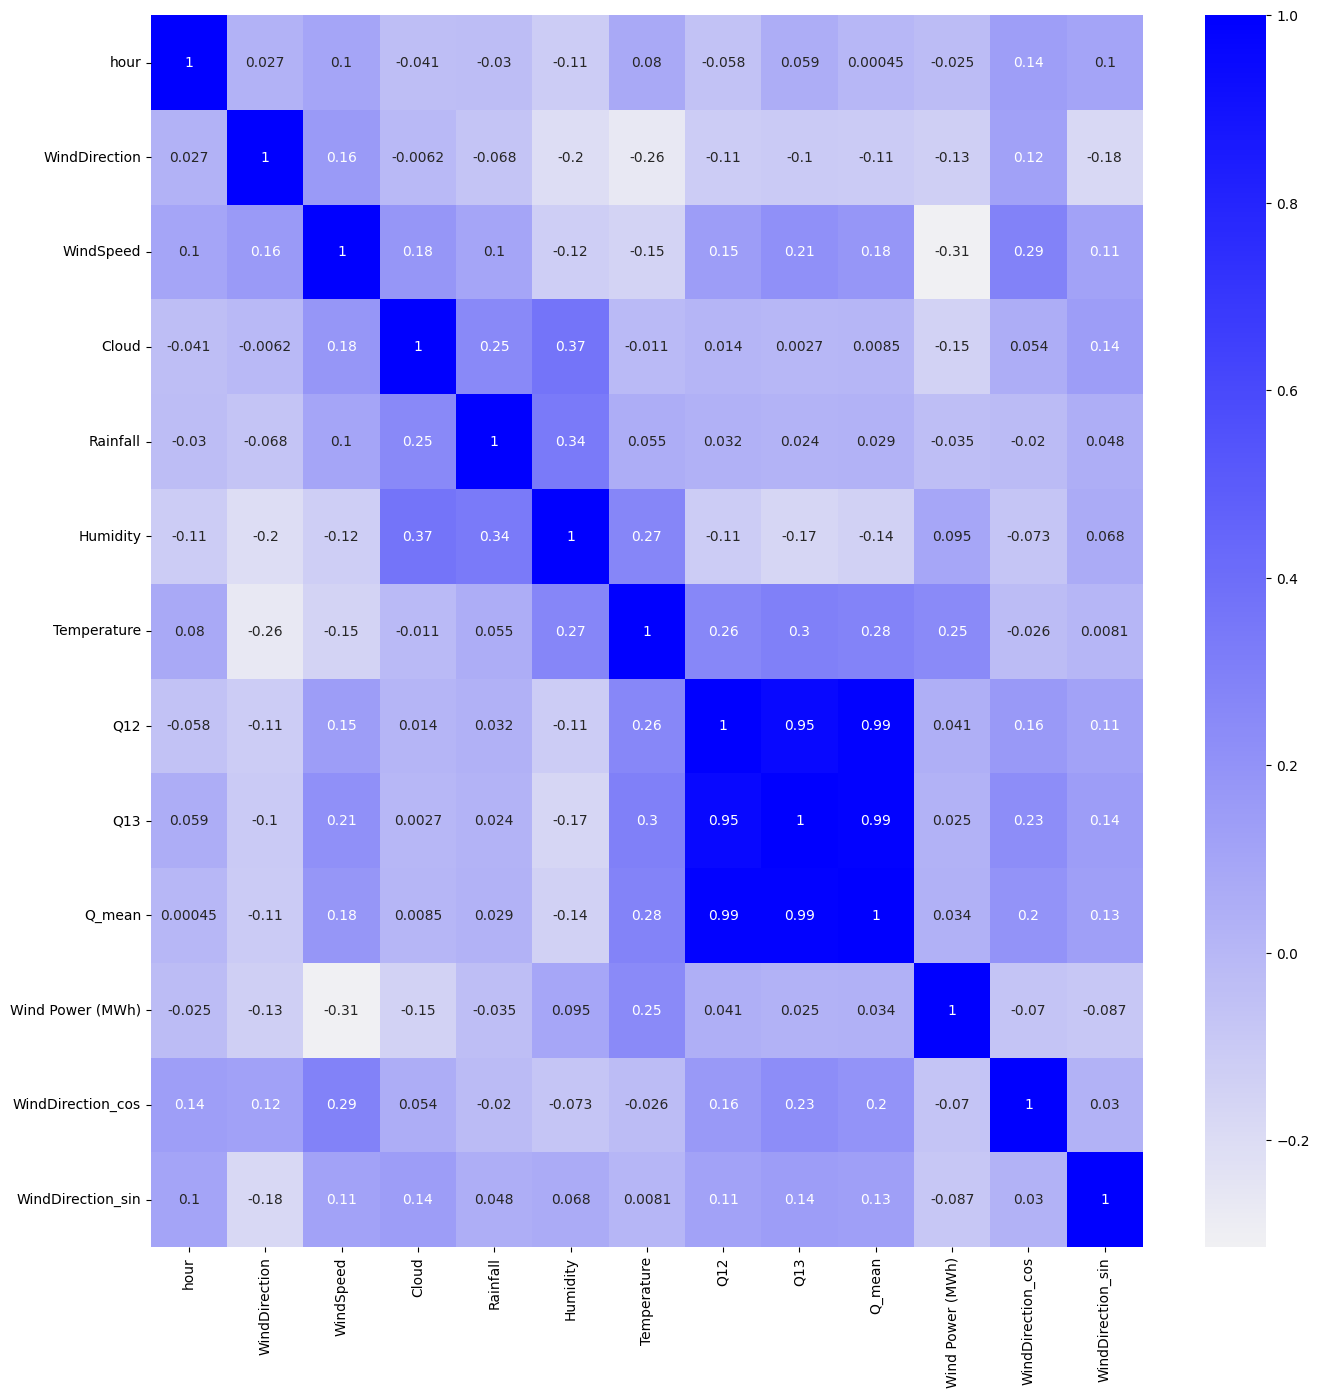

In [10]:
plt.figure(figsize=(16,16))
cmap = sns.light_palette(color = "b", as_cmap = True)
sns.heatmap(merged_df_jeju.corr(), annot = True, cmap = cmap)
plt.show()

Drop unnecessary columns

In [11]:
merged_df_jeju = merged_df_jeju.drop(columns = ['WindDirection', 'Q12', 'Q13', 'date'])

Drop unnecessary rows

In [12]:
merged_df_jeju = merged_df_jeju[merged_df_jeju['Wind Power (MWh)'] < 1000]
merged_df_jeju.reset_index(drop=True, inplace = True)

Scaling

In [13]:
columns_to_scale = ['WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q_mean']
sd_scaler = StandardScaler()

sd_scaler.fit(merged_df_jeju[columns_to_scale])
merged_df_jeju[columns_to_scale] = sd_scaler.transform(merged_df_jeju[columns_to_scale])

dump(sd_scaler, 'sd_scaler.bin', compress = True)

['sd_scaler.bin']

Feature Selection

In [14]:
PCA_df = merged_df_jeju.drop(columns = ['Wind Power (MWh)', 'WindSpeed', 'WindDirection_cos', 'WindDirection_sin'])

# Using mRMR
# selected_features = pymrmr.mRMR(X_train, 'MIQ', 5)
# print('Selected Features via mRMR: ', selected_features)

# PCA
pca = PCA(n_components = 3)
pca.fit(PCA_df)
PCA_df = pca.transform(PCA_df)
principalDf = pd.DataFrame(data = PCA_df, columns = ['PC1', 'PC2', 'PC3'])

dump(pca, 'pca_model.joblib')

X_train = pd.concat([merged_df_jeju[['WindSpeed', 'WindDirection_cos', 'WindDirection_sin']], principalDf], axis = 1)
y_train = merged_df_jeju['Wind Power (MWh)']

# X_train = merged_df_jeju[['WindSpeed', 'Rainfall', 'Cloud']]
# y_train = merged_df_jeju['Wind Power (MWh)']

display(X_train)
display(y_train)

,WindSpeed,WindDirection_cos,WindDirection_sin,PC1,PC2,PC3
0,1.360624,0.903705,-0.428155,-14.918568,11.261293,5.513189
1,1.093110,0.903705,-0.428155,-14.904841,10.268631,5.493593
2,1.039607,0.903705,-0.428155,-14.888549,9.265881,5.504063
3,0.986104,0.903705,-0.428155,-14.872389,8.263497,5.506124
4,0.344069,0.562429,0.826846,-14.855271,7.257398,5.521037
...,...,...,...,...,...,...
14142,-0.083955,0.903705,-0.428155,15.501833,-7.217837,-5.189071
14143,-0.351470,0.562429,0.826846,15.517116,-8.216598,-5.189280
14144,-0.190961,0.903705,-0.428155,15.532392,-9.215543,-5.199487
14145,-0.886499,0.240988,-0.970528,15.548779,-10.218752,-5.195677


0         91.822526
1         79.594526
2         93.165053
3         88.447579
4        154.077053
            ...    
14142     46.130526
14143     56.694737
14144     59.407368
14145     47.329474
14146     65.934737
Name: Wind Power (MWh), Length: 14147, dtype: float64

## Modeling

In [15]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.optim import Adam, lr_scheduler
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from torchmetrics.regression import MeanAbsolutePercentageError

from sklearn.model_selection import train_test_split

In [16]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

cpu


In [17]:
X_train, y_train = X_train.to_numpy(dtype = np.float32), y_train.to_numpy(dtype = np.float32)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

print(len(X_train), len(X_val), len(X_test))

9902 2122 2123


In [18]:
# Dataset
class Windpower_Dataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __getitem__(self, index):
        return {
            'input': self.inputs[index],
            'label': self.outputs[index]
        }

    def __len__(self):
        return len(self.inputs)

In [19]:
# DataLoader
batch_size = 32
train_loader = DataLoader(Windpower_Dataset(X_train, y_train), batch_size = batch_size, shuffle = False,
                          drop_last = False, num_workers = 2, pin_memory = True)
val_loader = DataLoader(Windpower_Dataset(X_val, y_val), batch_size = batch_size, shuffle = False,
                        drop_last = False, num_workers = 2, pin_memory = True)
test_loader = DataLoader(Windpower_Dataset(X_test, y_test), batch_size = batch_size, shuffle = False,
                         drop_last = False, num_workers = 2, pin_memory = True)

In [20]:
class Windpower_MLP(nn.Module):
    def __init__(self):
        super(Windpower_MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(6, 32), nn.ReLU(), # nn.Dropout(),
            nn.Linear(32, 64), nn.ReLU(),
            nn.Linear(64, 10), nn.ReLU(), # nn.Dropout(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [21]:
# Training
def train(model, optimizer, criterion, train_loader):
    model.train()
    train_loss = 0
    for step, data in enumerate(tqdm(train_loader)):
        inputs, labels = data['input'], data['label']
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()

        optimizer.step()
        train_loss += loss.item()

    return {
        'train_loss': train_loss,
        'total': len(train_loader)
    }

In [22]:
# Validation
def val(model, criterion, val_loader):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for _, data in enumerate(tqdm(val_loader)):
            inputs, labels = data['input'], data['label']
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            val_loss += loss.item()

    return {
        'val_loss': val_loss,
        'total': len(val_loader)
    }

In [23]:
# Test
def test(model, criterion, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for _, data in enumerate(tqdm(test_loader)):
            inputs, labels = data['input'], data['label']
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)

            test_loss += loss.item()

    return {
        'test_loss': test_loss,
        'total': len(test_loader)
    }

In [24]:
model = Windpower_MLP().to(DEVICE)

lr = 0.001
epochs = 40
optimizer = Adam(model.parameters(), lr = lr)
criterion = nn.MSELoss()
# criterion = MeanAbsolutePercentageError().to(DEVICE)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

train_losses, val_losses, test_losses = [], [], []

for epoch in range(1, epochs + 1):
    # Train model
    print(f'Training Epoch {epoch}')
    train_info = train(model, optimizer, criterion, train_loader)
    train_loss = train_info['train_loss'] / train_info['total']
    train_losses.append(train_loss)

    # Validate model
    val_info = val(model, criterion, val_loader)
    val_loss = val_info['val_loss'] / val_info['total']
    val_losses.append(val_loss)

    # Test model
    test_info = test(model, criterion, test_loader)
    test_loss = test_info['test_loss'] / test_info['total']
    test_losses.append(test_loss)

    scheduler.step()


Training Epoch 1


100%|██████████| 67/67 [00:00<00:00, 118.06it/s]


Training Epoch 2


100%|██████████| 67/67 [00:00<00:00, 83.58it/s] 


Training Epoch 3


100%|██████████| 67/67 [00:00<00:00, 72.18it/s] 


Training Epoch 4


100%|██████████| 67/67 [00:00<00:00, 74.00it/s] 


Training Epoch 5


100%|██████████| 67/67 [00:00<00:00, 146.25it/s]


Training Epoch 6


100%|██████████| 67/67 [00:00<00:00, 271.08it/s]


Training Epoch 7


100%|██████████| 67/67 [00:00<00:00, 240.01it/s]


Training Epoch 8


100%|██████████| 67/67 [00:00<00:00, 253.35it/s]


Training Epoch 9


100%|██████████| 67/67 [00:00<00:00, 205.78it/s]


Training Epoch 10


100%|██████████| 67/67 [00:00<00:00, 168.63it/s]


Training Epoch 11


100%|██████████| 67/67 [00:00<00:00, 290.60it/s]


Training Epoch 12


100%|██████████| 67/67 [00:00<00:00, 232.81it/s]


Training Epoch 13


100%|██████████| 67/67 [00:00<00:00, 234.26it/s]


Training Epoch 14


100%|██████████| 67/67 [00:00<00:00, 256.65it/s]


Training Epoch 15


100%|██████████| 67/67 [00:00<00:00, 282.55it/s]


Training Epoch 16


100%|██████████| 67/67 [00:00<00:00, 188.97it/s]


Training Epoch 17


100%|██████████| 67/67 [00:00<00:00, 265.95it/s]


Training Epoch 18


100%|██████████| 67/67 [00:00<00:00, 292.13it/s]


Training Epoch 19


100%|██████████| 67/67 [00:00<00:00, 286.31it/s]


Training Epoch 20


100%|██████████| 67/67 [00:00<00:00, 272.84it/s]


Training Epoch 21


100%|██████████| 67/67 [00:00<00:00, 248.94it/s]


Training Epoch 22


100%|██████████| 67/67 [00:00<00:00, 260.36it/s]


Training Epoch 23


100%|██████████| 67/67 [00:00<00:00, 137.04it/s]


Training Epoch 24


100%|██████████| 67/67 [00:00<00:00, 250.41it/s]


Training Epoch 25


100%|██████████| 67/67 [00:00<00:00, 235.83it/s]


Training Epoch 26


100%|██████████| 67/67 [00:00<00:00, 239.96it/s]


Training Epoch 27


100%|██████████| 67/67 [00:00<00:00, 278.05it/s]


Training Epoch 28


100%|██████████| 67/67 [00:00<00:00, 235.67it/s]


Training Epoch 29


100%|██████████| 67/67 [00:00<00:00, 180.47it/s]


Training Epoch 30


100%|██████████| 67/67 [00:00<00:00, 269.49it/s]


Training Epoch 31


100%|██████████| 67/67 [00:00<00:00, 312.72it/s]


Training Epoch 32


100%|██████████| 67/67 [00:00<00:00, 244.75it/s]


Training Epoch 33


100%|██████████| 67/67 [00:00<00:00, 271.82it/s]


Training Epoch 34


100%|██████████| 67/67 [00:00<00:00, 262.24it/s]


Training Epoch 35


100%|██████████| 67/67 [00:00<00:00, 219.71it/s]


Training Epoch 36


100%|██████████| 67/67 [00:00<00:00, 170.62it/s]


Training Epoch 37


100%|██████████| 67/67 [00:00<00:00, 236.47it/s]


Training Epoch 38


100%|██████████| 67/67 [00:00<00:00, 237.63it/s]


Training Epoch 39


100%|██████████| 67/67 [00:00<00:00, 283.54it/s]


Training Epoch 40


100%|██████████| 67/67 [00:00<00:00, 220.84it/s]


train_losses: [94675.59123613911, 72764.64732862903, 70914.46222278225, 69422.16636844758, 68137.2773626512, 66927.42878024194, 65737.02309097782, 64433.19100302419, 63089.48466481855, 61671.11083669355, 60448.86875, 59770.48102948588, 59256.63754410282, 58882.57991431452, 58628.95752268145, 58456.27580645162, 58337.43199344758, 58249.3753969254, 58176.127060231855, 58111.96018775202, 57992.968567288306, 57952.03465851815, 57926.54441154234, 57901.874231350805, 57879.02680821573, 57859.160326360885, 57840.015070564514, 57821.135496471776, 57803.313344254035, 57785.90926789315, 57723.23039314516, 57712.11767893145, 57703.31881930443, 57694.67454637097, 57686.03308971774, 57677.49911164315, 57669.12888104839, 57660.976379788306, 57653.08520035282, 57645.45042212702]
val_losses: [77378.18070778919, 75071.02865555037, 73299.43108675373, 71817.26329291044, 70477.2271746735, 69194.43560517723, 67821.80780666978, 66345.04885727612, 64782.03037546642, 63230.28582672575, 62351.14056669776, 6178

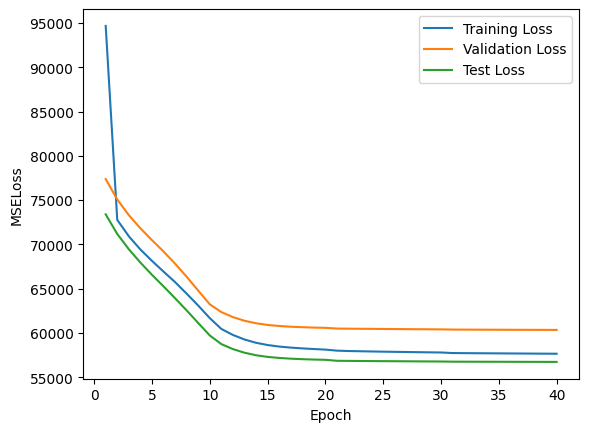

In [25]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label = 'Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label = 'Validation Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label = 'Test Loss')

print(f'train_losses: {train_losses}')
print(f'val_losses: {val_losses}')
print(f'test_losses: {test_losses}')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSELoss')
plt.show()

In [26]:
for _, data in enumerate(tqdm(test_loader)):
    inputs, labels = data['input'], data['label']
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

    outputs = model(inputs)
    print(f'labels: {labels}')
    print(f'outputs: {outputs}')

 28%|██▊       | 19/67 [00:00<00:00, 106.61it/s]

labels: tensor([269.8895, 474.3596, 409.7579, 485.0495,  39.0411, 990.9916,  21.2745,
        588.8950,  81.0126,  45.2400,  64.3680, 465.5221, 537.3748,  41.8800,
         94.8421, 853.4076, 138.0526,  87.5280, 344.7305,  41.2242,  14.2389,
        579.3632, 553.0530, 287.8215, 546.9400, 470.4272, 466.0488,  29.4832,
        101.1811, 436.5625,  18.6000,  97.0516])
outputs: tensor([[183.3594],
        [333.7098],
        [339.5463],
        [147.2209],
        [174.7817],
        [432.9181],
        [221.7456],
        [463.2596],
        [293.0815],
        [371.5056],
        [250.4987],
        [252.8725],
        [441.3362],
        [101.8096],
        [134.1678],
        [341.0964],
        [349.3839],
        [238.9463],
        [158.3621],
        [329.3272],
        [276.0547],
        [259.9740],
        [248.7375],
        [279.4305],
        [339.6018],
        [285.1436],
        [287.6846],
        [132.2913],
        [ 97.8737],
        [311.5371],
        [282.1282],
  

 73%|███████▎  | 49/67 [00:00<00:00, 132.09it/s]

labels: tensor([283.2926, 121.8105, 117.9684, 139.1501, 134.4480,  43.3625, 134.2010,
         96.0421,  55.1916,  76.7865, 792.0889, 354.9516, 108.7126, 135.3920,
        122.3579, 242.6617,  46.2421, 322.2842, 397.9507,  55.8587,   1.8000,
         75.2901, 322.3493,  79.2105, 454.0052,  12.2011, 271.3869, 197.5564,
         61.2811, 567.0789,  65.5836,  23.2200])
outputs: tensor([[217.4445],
        [264.9608],
        [295.4145],
        [275.3310],
        [346.0060],
        [498.4424],
        [176.7877],
        [198.0497],
        [153.3930],
        [130.8224],
        [296.4604],
        [359.7736],
        [195.7272],
        [369.9490],
        [233.0087],
        [174.9119],
        [164.3966],
        [417.8105],
        [307.5826],
        [340.4867],
        [152.6921],
        [150.3924],
        [341.0562],
        [112.3838],
        [264.7967],
        [298.1224],
        [462.8861],
        [323.5884],
        [120.8359],
        [350.9565],
        [269.6475],
  

100%|██████████| 67/67 [00:00<00:00, 120.82it/s]

labels: tensor([ 65.5305, 100.6800, 189.6017, 332.9021, 241.1389, 870.8118, 580.9398,
        440.5253, 108.4495, 542.8068,  63.7507, 175.0400, 320.1964, 151.3832,
        312.9409, 443.1530,  49.0063, 143.1225, 459.9457, 132.7032, 792.4057,
        931.4528,  51.6589, 174.4760, 160.3853,  45.9200, 306.8326, 375.8183,
         15.0474, 310.2796,  97.2421, 327.0886])
outputs: tensor([[290.4006],
        [149.5191],
        [416.4065],
        [388.1843],
        [233.7726],
        [347.6818],
        [236.6502],
        [393.8385],
        [ 57.1368],
        [261.3486],
        [187.1084],
        [236.9832],
        [401.0143],
        [165.9477],
        [274.1008],
        [507.1256],
        [164.4423],
        [243.6765],
        [412.3016],
        [278.6806],
        [165.1245],
        [354.0626],
        [357.0734],
        [269.5067],
        [380.6497],
        [104.1457],
        [294.8229],
        [349.7317],
        [358.4799],
        [262.5730],
        [190.6146],
  

In [27]:
torch.save(model, 'windpower_model.pt')